# Sliding Window

In [1]:
import cv2

In [2]:
import imutils

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

https://www.pyimagesearch.com/2015/03/16/image-pyramids-with-python-and-opencv/

In [4]:
def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image
    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)
        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break
        # yield the next image in the pyramid
        yield image

https://www.pyimagesearch.com/2015/03/23/sliding-windows-for-object-detection-with-python-and-opencv/

In [5]:
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [6]:
import argparse
import time

In [7]:
# load the image and define the window width and height
image = cv2.imread('../data/hands/user_3/A0.jpg')

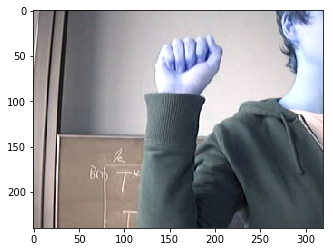

In [8]:
plt.imshow(image)

In [9]:
(winW, winH) = (128, 128)

In [10]:
def build_windows(image, folder, name):
    
    # loop over the image pyramid
    for i, resized in enumerate(pyramid(image, scale=1.5)):
        # loop over the sliding window for each layer of the pyramid
        for j, (x, y, window) in enumerate(sliding_window(resized, stepSize=32, windowSize=(winW, winH))):
            # if the window does not meet our desired window size, ignore it
            if window.shape[0] != winH or window.shape[1] != winW:
                continue

            # THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
            # MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
            # WINDOW

            # since we do not have a classifier, we'll just draw the window
            clone = resized.copy()
            cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
            # plt.imshow(clone)
            # cv2.imshow('Window', clone)
            filename = '%s/%s_%s_%s.png' % (folder, name, i, j)
            cv2.imwrite(filename, clone)
            #cv2.waitKey(1)

            time.sleep(0.025)

In [11]:
build_windows(image, '../regions/', 'A0')

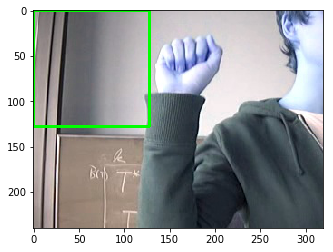

In [12]:
plt.imshow(cv2.imread('../regions/A0_0_0.png'))

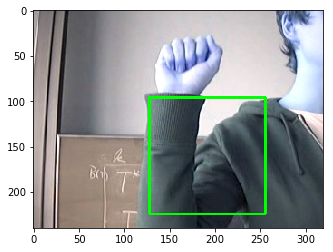

In [13]:
plt.imshow(cv2.imread('../regions/A0_0_34.png'))